In [17]:
import OffsetArrays
using Plots
using Revise
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
using IterTools
using DelimitedFiles


# Phase Space interaction-autoinfection

In [2]:
# S=0   I=1
# The times go from ti = 0 to ti=T+1
# when ti=0 it means that i is the zero patient
# when ti=T+1 it means that i is never infected

fr = 0.0
dil = 0.0
d = 3 # degree (fixed for now) 
T = 8 # discrete time

grid = 20
γvalues = LinRange(0.01,0.25,grid) # planted autoinfection probability
λvalues = γvalues # planted infection rate
folderstring = "./T=$(T)_d=$(d)_min=$(γvalues[1])_max=$(γvalues[end])_fr=$(fr)_dil=$(dil)/"

"./T=8_d=3_min=0.01_max=0.25_fr=0.0_dil=0.0/"

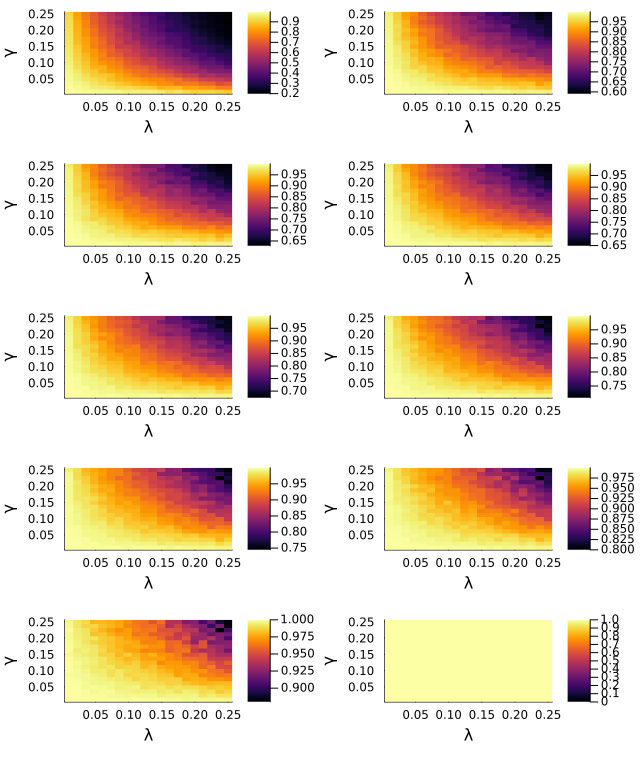

In [4]:
diag = readdlm("$(folderstring)diag.txt")
AUC = zeros(grid,grid,T+2)
for t = 2 : T + 2 
    AUC[:,:,t] .= readdlm("$(folderstring)AUC$(t - 1).txt") 
end

AUC[isnan.(AUC)] .= 1 ;
hdiag = heatmap(γvalues,λvalues,diag)
hAUC = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)

for t = 2 : T + 2 
    hAUC[t-1] = heatmap(γvalues,λvalues,AUC[:,:,t]) 
end

plot(hdiag, hAUC..., size=(640,760),layout = (5, 2),xlabel="λ",ylabel="γ")

#savefig("inference.pdf")

# Phase Space FalseRate - Dilution

In [58]:
grid = 7
T = 8
graphtypes= ["rr","er"]
graph = graphtypes[2]
samp = 1;
d = 3

3

In [59]:
frRange = LinRange(0.0,0.5,grid) # planted autoinfection probability
dilRange = LinRange(0.0,1.0,grid) # planted infection rate
diag = readdlm("./fr_dil_$(graph)_$(samp)/diag.txt")
AUC = zeros(grid,grid,T+2)
for t = 2 : T + 2 
    AUC[:,:,t] .= readdlm("./fr_dil_$(graph)_$(samp)/AUC$(t - 1).txt") 
end

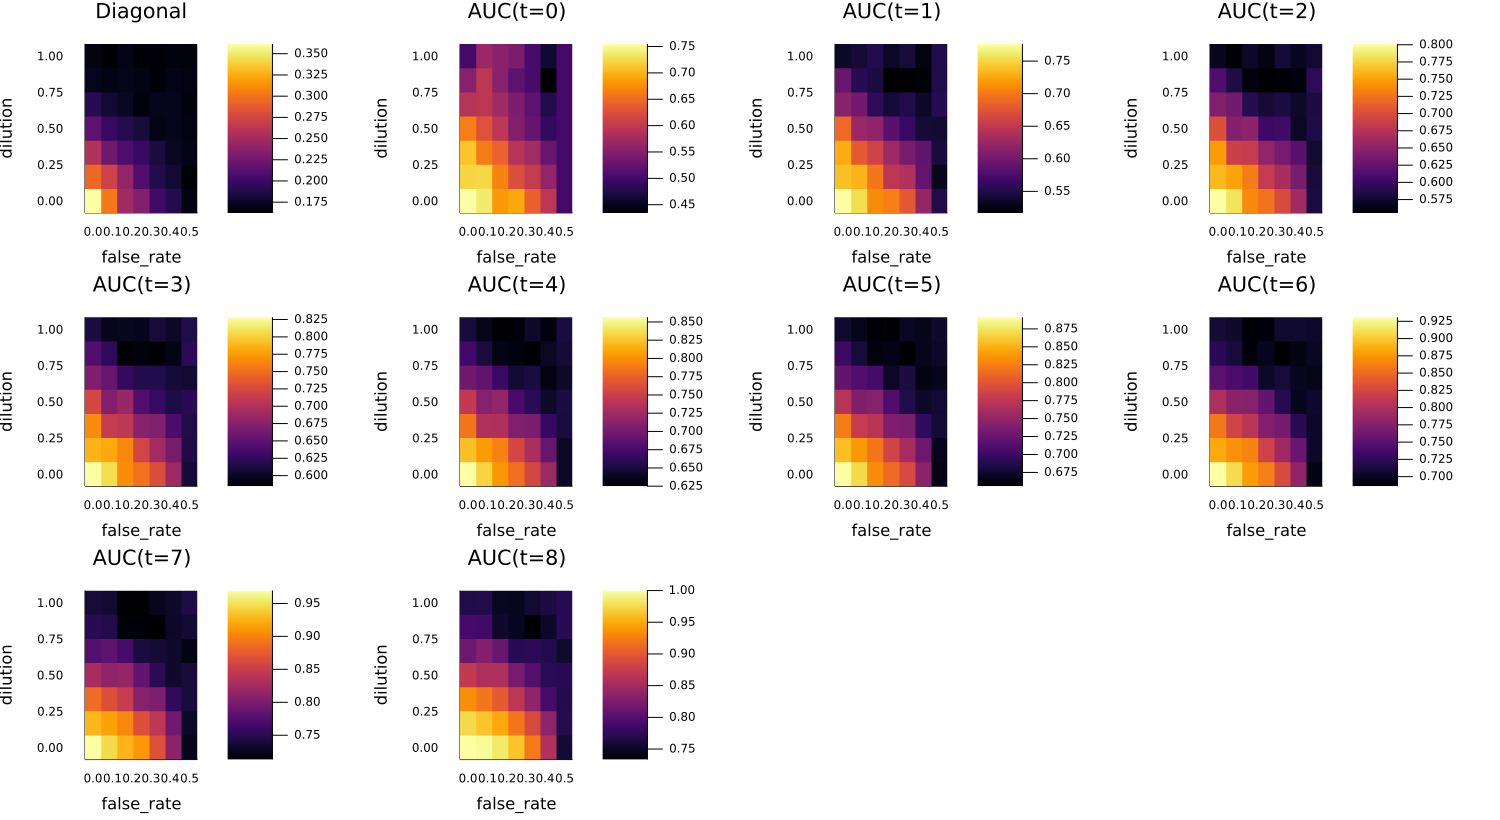

In [6]:
AUC[isnan.(AUC)] .= 1 ;
hdiag = heatmap(frRange,dilRange,diag,title="Diagonal")
hAUC = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)

for t = 2 : T + 2 
    hAUC[t-1] = heatmap(frRange,dilRange,AUC[:,:,t],title="AUC(t=$(t-2))") 
end

plot(hdiag, hAUC..., size=(1500,820),layout = 10,ylabel="dilution",xlabel="false_rate",margin=5Plots.mm)

In [7]:
savefig("fr_dil2.pdf")

# Phase Space Interaction - Dilution

In [4]:
grid = 10
T = 8
d = 3
graphtypes= ["rr","er","ft"]
graph = graphtypes[2]
samp = 4;

In [5]:
λRange = LinRange(0.01,0.4,grid)
dilRange = LinRange(0.0,1.0,grid)
path = "./dil_lam_$(graph)_$(samp)/"
diag = readdlm("$(path)diag.txt")
AUC = zeros(grid,grid,T+2)
for t = 2 : T + 2 
    AUC[:,:,t] .= readdlm("$(path)AUC$(t - 1).txt") 
end

LoadError: DimensionMismatch("array could not be broadcast to match destination")

In [51]:
ni = readdlm("./infected/ni_$(graph)_T=$(T)_d=$(d)_lam0.01_1.0.txt")
using Interpolations
itp = LinearInterpolation(LinRange(0.01,1,100),vec(ni));
ni = [itp(t) for t in λRange];

In [44]:
#AUC[isnan.(AUC)] .= 1 ;
hdiag = heatmap(dilRange,ni,diag,title="Diagonal")
hAUC = Array{Plots.Plot{Plots.GRBackend}}(undef,T+1)

for t = 2 : T + 2 
    hAUC[t-1] = heatmap(dilRange,ni,AUC[:,:,t],title="AUC(t=$(t-2))")#,clims=(0.5,1)) 
end

plot(hdiag, hAUC..., size=(1500,820),layout = 10,xlabel="dilution",ylabel="n_inf",margin=5Plots.mm)

ArgumentError: ArgumentError: Length of x & y does not match the size of z.
Must be either `size(z) == (length(y), length(x))` (x & y define midpoints)
or `size(z) == (length(y)+1, length(x)+1))` (x & y define edges).


In [45]:
savefig("$(path)figure.pdf")

LoadError: ArgumentError: Length of x & y does not match the size of z.
Must be either `size(z) == (length(y), length(x))` (x & y define midpoints)
or `size(z) == (length(y)+1, length(x)+1))` (x & y define edges).


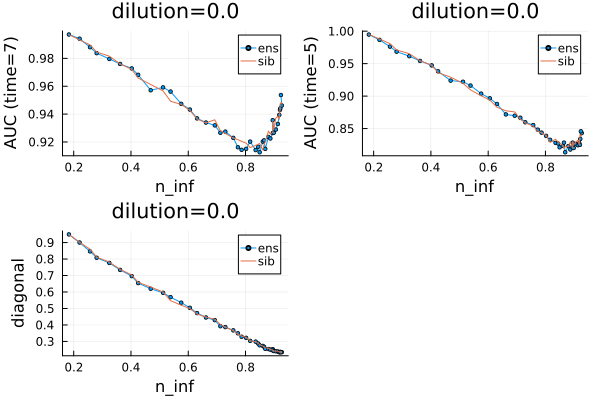

In [63]:
ni = readdlm("./infected/ni_$(graph)_T=$(T)_d=$(d)_lam0.01_1.0.txt")
using Interpolations
itp = LinearInterpolation(LinRange(0.01,1,100),vec(ni));
ni = [itp(t) for t in LinRange(0.01,0.4,41)];
dil = [0,0.5]


t = 7
s = 1
a = readdlm("dil_lam_er_4/AUC$(t).txt")
p1 = plot(ni,a[:,s],marker=:c,ylabel="AUC (time=$t)",label="ens",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("../test/AUC$(t).txt")
p1 = plot!(ni,b,ylabel="AUC (time=$t)",label="sib",xlabel="n_inf",title="dilution=$(dil[s])")

t = 5
a = readdlm("dil_lam_er_4/AUC$(t).txt")
p2 = plot(ni,a[:,s],marker=:c,label="ens",ylabel="AUC (time=$t)",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("../test/AUC$(t).txt")
p2 = plot!(ni,b,ylabel="AUC (time=$t)",label="sib",xlabel="n_inf",title="dilution=$(dil[s])")

a = readdlm("dil_lam_er_4/diag.txt")
p3 = plot(ni,a[:,s],marker=:c,label="ens",ylabel="diagonal",xlabel="n_inf",title="dilution=$(dil[s])")
b = readdlm("../test/diag.txt")
p3 = plot!(ni,b,xlabel="n_inf",label="sib",title="dilution=$(dil[s])")



plot(p1,p2,p3,markersize=2)

In [64]:
savefig("dil_lam_er_4/AUCnomono.pdf")

"/home/students/mmariani/git/Epidemble/results/dil_lam_er_4/AUCnomono.pdf"